<h1>Análisando algoritmos de ordenamiento</h1>

In [2]:
import math
import numpy as np
import pylab as pl
%matplotlib inline

<h2>Problema de ordenamiento</h2>

Input:  $A[1..n] = <a_1,a_2\ldots, a_n>$

Output: $A'[1..n] = <a'_1,a'_2\ldots, a'_n> : a'_1\leq a'_2 \leq \ldots \leq  a'_n$

<h3> Ordenamiento por inserción </h3>

In [3]:
def insertion_sort(A):
    j = 1
    while j < len(A):
        key = A[j]
        i = j - 1
        while (i >= 0) and (A[i] > key):
            A[i + 1] = A[i]
            i = i -1
        A[i + 1] = key
        j = j + 1

In [4]:
B = np.random.permutation(range(0,10))
print B
insertion_sort(B)
print B

[3 2 6 9 4 5 0 8 1 7]
[0 1 2 3 4 5 6 7 8 9]


<h4>Correctitud</h4>

<b>Invariante:</b> Al comienzo de cada iteración del ciclo externo el subarreglo $A[0..j-1]$ consiste de los elementos originalmente en $A[0..j-1]$ pero ordenados.

In [5]:
def invariant(A, original_A):
    l1 = list(A)
    l2 = list(original_A)
    l2.sort()
    return l1 == l2

In [6]:
print invariant([1, 2, 3, 4], [4, 3, 2, 1])
print invariant([1, 2, 3, 4], [5, 3, 2, 1])

True
False


Algoritmo de ordenamiento por inserción incluyendo evaluación de la invariante (inicialización, mantenimiento, terminación)

In [7]:
def right_insertion_sort(A):
    original_A = list(A)
    j = 1
    assert invariant(A[0:j], original_A[0:j])
    while j < len(A):
        assert invariant(A[0:j], original_A[0:j])
        key = A[j]
        i = j - 1
        while (i >= 0) and (A[i] > key):
            A[i + 1] = A[i]
            i = i -1        
        A[i + 1] = key
        j = j + 1
    assert invariant(A[0:j], original_A[0:j])

In [8]:
B = [5, 4, 6, 3, 7, 2, 8, 1, 9]
right_insertion_sort(B)
print B

[1, 2, 3, 4, 5, 6, 7, 8, 9]


La siguiente función incluye un error, por lo tanto la aserción para comprobar el invariante de ciclo falla. Esto genera una excepción que es capturada para imprimir un mensaje y el estado de las variables.

In [9]:
def wrong_insertion_sort(A):
    original_A = list(A)
    j = 1
    try:
        assert invariant(A[0:j], original_A[0:j])
        while j < len(A):
            assert invariant(A[0:j], original_A[0:j])
            key = A[j]
            i = j - 1
            while (i >= 0) and (A[i] < key):
                A[i + 1] = A[i]
                i = i - 1        
            A[i + 1] = key
            j = j + 1
        assert invariant(A[0:j], original_A[0:j])
    except  AssertionError:
        print "Error en el invariante de ciclo!"
        print "j=", j
        print "i=", i
        print "A=", A
        print "Original A=", original_A

In [10]:
B = [5, 4, 6, 3, 7, 2, 8, 1, 9]
wrong_insertion_sort(B)

Error en el invariante de ciclo!
j= 2
i= 0
A= [5, 4, 6, 3, 7, 2, 8, 1, 9]
Original A= [5, 4, 6, 3, 7, 2, 8, 1, 9]


<h4> Análisis del tiempo de ejecución</h4>

In [11]:
class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps
        
def acct_insertion_sort(A, acct):
    j = 1; acct.count()
    acct.count()
    while j < len(A):
        acct.count()
        key = A[j]; acct.count()
        i = j - 1; acct.count()
        acct.count()
        while (i >= 0) and (A[i] > key):
            acct.count()
            A[i + 1] = A[i]; acct.count()
            i = i -1; acct.count()
        A[i + 1] = key; acct.count()
        j = j + 1; acct.count()

In [12]:
B = np.random.permutation(range(0,10))
acct = Counter()
acct_insertion_sort(B, acct)
acct.print_steps()

Number of steps = 113


<h4>Análisis experimental</h4>
Ahora vamos a analizar el comportamiento del algoritmo cuando el tamaño de la entrada varía. La siguiente función genera arreglos al azar de tamaño 1 a n, llama la función acct_insertion_sort(l, acct) y contabiliza el número de pasos.

In [13]:
import random as rnd

def exper_analysis(n):
    results = []
    acct = Counter()
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        acct.reset()
        acct_insertion_sort(l, acct)
        results.append(acct.steps)
    return results

In [14]:
print exper_analysis(10)

[2, 2, 8, 17, 26, 44, 38, 62, 77, 92]


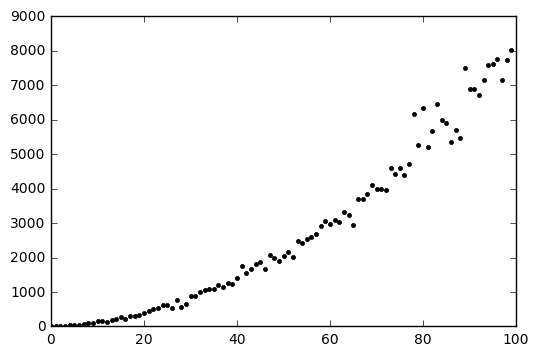

In [15]:
pl.clf()
x = np.arange(100)
y = np.array(exper_analysis(100))
pl.plot(x, y, 'k.')

<h1>Actividad</h1>
 <ol>
  <li>En una sola gráfica represente el número de operaciones, tiempo y T(n) que el algoritmo de ordenamiento por inserción requiere para ordenar arreglos de tamaño n (varie n) en el peor de los casos.</li>
  <li>Replique los ejercicios realizados en este taller para el algoritmo de ordenamiento por mezclas (merge sort)</li>
  <li>Replique los ejercicios realizados en este taller para el algoritmo de ordenamiento quick-sort</li>
</ol> 

In [32]:
import random as rnd
import time
def exper_analysis2(n):
    results = []
    acct = Counter()
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        tic = time.clock()
        right_insertion_sort(l)
        toc = time.clock()
        results.append((toc-tic)*1e6)
    return results

In [27]:
print exper_analysis2(10)

[10.9999999997612, 10.000000000065512, 11.999999999900979, 17.00000000015578, 25.000000000385825, 24.999999999941735, 29.000000000056758, 55.99999999983396, 45.99999999976845, 61.00000000008876]


In [77]:
def exper_analysis_T(n):
    results = []
    for i in range(n):
        results.append(i*i)
    return results

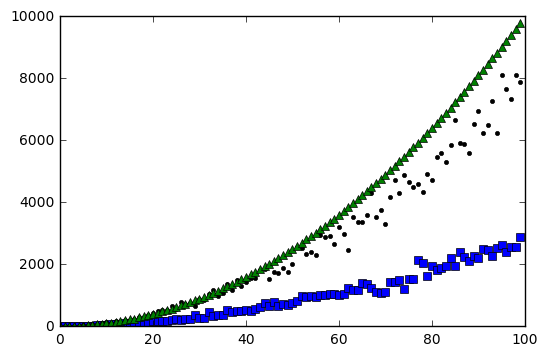

In [79]:
pl.clf()
x = np.arange(100)
y1 = np.array(exper_analysis2(100)) #Time
y2 = np.array(exper_analysis(100)) # Number of Operations
y3 = np.array(exper_analysis_T(100)) # T(n) = n^2
pl.plot(x, y1, 'bs', x, y2, '.k', x,y3,'g^')
pl.show()

<h1>Merge Sort Analysis</h1>

<h2>Merge Sort Algorithm</h2>

In [35]:
def merge(a, aux, lo, mid, hi):
    for k in range(lo, hi + 1):
        aux[k] = a[k]
    i = lo
    j = mid + 1
    for k in range(lo, hi + 1):
        if (i > mid): 
            a[k] = aux[j]
            j+=1
        elif (j > hi):
            a[k] = aux[i]
            i+=1
        elif (aux[j] < aux[i]):
            a[k] = aux[j]
            j+=1
        else:
            a[k] = aux[i]
            i+=1
def sort(a, aux, lo, hi):
    if (hi <= lo):
        return
    mid = lo + (hi - lo) / 2
    sort(a, aux, lo, mid)
    sort(a, aux, mid+1, hi)
    merge(a, aux, lo, mid, hi)
def mergeSort(a):
    aux = [None] * len(a)
    sort(a, aux, 0, len(a) - 1)

In [36]:
B = np.random.permutation(range(0,10))
print B
insertion_sort(B)
print B

[3 8 7 2 6 0 1 5 4 9]
[0 1 2 3 4 5 6 7 8 9]


<h3>Correctitud</h3>

<b>Invariante:</b> Al comienzo de cada merge el arreglo $A[lo..mid]$ esta ordenado y $A[mid+1..hi]$ también esta ordenado.

In [37]:
def mergeInvariant(A, B):
    l1 = list(A)
    l2 = list(B)
    l1.sort()
    l2.sort()
    return (A == l1) and (B == l2)

In [38]:
print mergeInvariant([1, 2, 3, 4], [4, 3, 2, 1])
print mergeInvariant([1, 2, 3, 4], [6, 7, 8, 9])

False
True


In [39]:
def mergeWithInvariant(a, aux, lo, mid, hi):
    try:
        assert mergeInvariant(a[lo:mid], a[mid+1:hi])
    except AssertionError:
        print "Error en el invariante en Merge!"
        print "Arreglo de lo a mid es: ", a[lo:mid]
        print "Arreglo de mid + 1 a hi es: ", a[mid+1:hi]
        
    for k in range(lo, hi + 1):
        aux[k] = a[k]
    i = lo
    j = mid + 1
    for k in range(lo, hi + 1):
        if (i > mid): 
            a[k] = aux[j]
            j+=1
        elif (j > hi):
            a[k] = aux[i]
            i+=1
        elif (aux[j] < aux[i]):
            a[k] = aux[j]
            j+=1
        else:
            a[k] = aux[i]
            i+=1

def rightMergeSortHelp(a, aux, lo, hi):
    if (hi <= lo):
        return
    mid = lo + (hi - lo) / 2
    sort(a, aux, lo, mid)
    sort(a, aux, mid+1, hi)
    mergeWithInvariant(a, aux, lo, mid, hi)
def rightMergeSort(a):
    aux = [None] * len(a)
    rightMergeSortHelp(a, aux, 0, len(a) - 1)

In [40]:
B = [5, 4, 6, 3, 7, 2, 8, 1, 9]
rightMergeSort(B)
print B

[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [41]:
def wrongMergeSortHelp(a, aux, lo, hi):
    if (hi <= lo):
        return
    mid = lo + (hi - lo) / 2
    sort(a, aux, lo, mid)
    mergeWithInvariant(a, aux, lo, mid, hi)
    #sort(a, aux, mid+1, hi)
    
        
def wrongMergeSort(a):
    aux = [None] * len(a)
    wrongMergeSortHelp(a, aux, 0, len(a) - 1)

In [42]:
B = [5, 4, 6, 3, 7, 2, 8, 1, 9]
wrongMergeSort(B)
print B

Error en el invariante en Merge!
Arreglo de lo a mid es:  [3, 4, 5, 6]
Arreglo de mid + 1 a hi es:  [2, 8, 1]
[2, 3, 4, 5, 6, 7, 8, 1, 9]


<h3> Análisis del Tiempo de Ejecución</h3>

In [43]:
def acct_merge(a, aux, lo, mid, hi, acct):
    for k in range(lo, hi + 1):
        aux[k] = a[k]
    i = lo
    j = mid + 1
    for k in range(lo, hi + 1):
        if (i > mid): 
            acct.count()
            a[k] = aux[j]
            j+=1
        elif (j > hi):
            acct.count()
            a[k] = aux[i]
            i+=1
        elif (aux[j] < aux[i]):
            acct.count()
            a[k] = aux[j]
            j+=1
        else:
            a[k] = aux[i]
            i+=1
def acct_sort(a, aux, lo, hi, acct):
    ##acct.count()
    if (hi <= lo):
        return
    mid = lo + (hi - lo) / 2
    acct_sort(a, aux, lo, mid, acct)
    acct_sort(a, aux, mid+1, hi, acct)
    acct_merge(a, aux, lo, mid, hi, acct)
def acct_mergeSort(a, acct):
    aux = [None] * len(a)
    acct_sort(a, aux, 0, len(a) - 1,  acct)

In [44]:
B = np.random.permutation(range(0,100))
acct = Counter()
acct_mergeSort(B, acct)
acct.print_steps()

Number of steps = 400


<h3>Análisis Experimental</h3>
<p>Número de comparaciones para ordenar el arreglo</p>

In [45]:
import random as rnd

def merge_exper_analysis(n):
    results = []
    acct = Counter()
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        acct.reset()
        acct_mergeSort(l, acct)
        results.append(acct.steps)
    return results

In [46]:
print merge_exper_analysis(10)

[0, 0, 1, 3, 4, 11, 14, 14, 15, 14]


<h3>Análisis de Tiempo</h3>
<p>Tiempo que toma para ordenar el arreglo</p>

In [60]:
import time
import random as rnd

def merege_time_analysis(n):
    results = []
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        tic = time.clock()#get start time
        mergeSort(l)
        toc = time.clock()#get final time
        results.append(format((toc - tic) * 1e5, '.6'))
    return results

In [54]:
print merege_time_analysis(10)

['0.6', '0.4', '1.3', '1.9', '2.3', '3.2', '3.7', '4.9', '5.6', '6.4']


In [95]:
import math
def nlogn(n):
    results = []
    for i in range(n):
        if i > 0:
            results.append(i * math.log(i, 2))
        else:
            results.append(0)
    return results

In [96]:
print nlogn(10)

[0, 0.0, 2.0, 4.754887502163469, 8.0, 11.60964047443681, 15.509775004326936, 19.651484454403228, 24.0, 28.529325012980813]


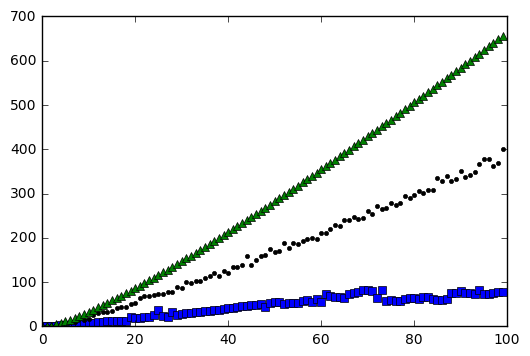

In [97]:
pl.clf()
x = np.arange(100)
y1 = np.array(merege_time_analysis(100))
y2 = np.array(merge_exper_analysis(100))
y3 = np.array(nlogn(100))
pl.plot(x, y1, 'bs', x, y2, '.k', x, y3, 'g^')
pl.show()

<h1>Quick Sort Analysis</h1>

In [64]:
def quickSort(alist):
    rnd.shuffle(alist)
    quickSortHelper(alist,0,len(alist)-1)

def quickSortHelper(alist,first,last):
    if first<last:
        splitpoint = partition(alist,first,last)
        quickSortHelper(alist,first,splitpoint-1)
        quickSortHelper(alist,splitpoint+1,last)


def partition(alist,first,last):
    pivotvalue = alist[first]


    leftmark = first+1
    rightmark = last
    
    done = False
    while not done:
        
    
        while leftmark <= rightmark and alist[leftmark] <= pivotvalue:
            leftmark = leftmark + 1

        while alist[rightmark] >= pivotvalue and rightmark >= leftmark:
            rightmark = rightmark -1

        if rightmark < leftmark:
            done = True
        else:
            temp = alist[leftmark]
            alist[leftmark] = alist[rightmark]
            alist[rightmark] = temp


    temp = alist[first]
    alist[first] = alist[rightmark]
    alist[rightmark] = temp
    assert quick_invariant(alist, rightmark,leftmark,pivotvalue)

    return rightmark

<h2>Correctitud</h2>
<h3>Invariante</h3>
<p>Partir el arreglo en una posiscion $i$ $j$ de manera que: </p>
<ul> 
    <li>No hay elemento mayor a $A[j]$ en las posiciones mayores a $j$</li>
    <li>No hay elemento menor a $A[i]$ en las posiciones menores a $i$</li>
</ul>

In [63]:
def contains_less_pivot(l, pivot):
    i = 1
    while i < len(l):
        if (l[i] > pivot ):
            return False
        i += 1
    return True
        
def quick_invariant(A, i, j, pivot):
    l = A[0:i]
    k = A[j: len(A) - 1]
    
    if (len(l) > 1):
        if not contains_less_pivot(l,pivot):
            return False
    if (len(k) > 1):
        if contains_less_pivot(k,pivot):
            return False
    return True

In [65]:
B = np.random.permutation(range(0,10))
print B
quickSort(B)
print B

[7 3 0 9 8 2 4 1 5 6]
[0 1 2 3 4 5 6 7 8 9]


<h2>Análisis de Complejidad</h2>
<h3> Análisis Experimental </h3>

In [103]:
def acct_quickSort(alist, acct):
    rnd.shuffle(alist)
    acct_quickSortHelper(alist,0,len(alist)-1, acct)

def acct_quickSortHelper(alist,first,last, acct):
    if first<last:
        acct.count()
        splitpoint = acct_partition(alist,first,last, acct)
        acct_quickSortHelper(alist,first,splitpoint-1, acct)
        acct_quickSortHelper(alist,splitpoint+1,last, acct)


def acct_partition(alist,first,last, acct):
    pivotvalue = alist[first]


    leftmark = first+1
    rightmark = last
    
    done = False
    while not done:
    
        while leftmark <= rightmark and alist[leftmark] <= pivotvalue:
            leftmark = leftmark + 1
            acct.count()

        while alist[rightmark] >= pivotvalue and rightmark >= leftmark:
            rightmark = rightmark -1
            acct.count()

        if rightmark < leftmark:
            done = True
        else:
            temp = alist[leftmark]
            alist[leftmark] = alist[rightmark]
            alist[rightmark] = temp


    temp = alist[first]
    alist[first] = alist[rightmark]
    alist[rightmark] = temp
    assert quick_invariant(alist, rightmark,leftmark,pivotvalue)

    return rightmark

In [67]:
import random as rnd

def quick_exper_analysis(n):
    results = []
    acct = Counter()
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        acct.reset()
        acct_quickSort(l, acct)
        results.append(acct.steps)
    return results

In [69]:
print quick_exper_analysis(10)

[0, 0, 3, 7, 8, 18, 19, 19, 35, 31]


In [72]:
import random as rnd
import time
def quick_time_analysis(n):
    results = []
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        tic = time.clock()#get start time
        quickSort(l)
        toc = time.clock()#get final time
        results.append(format((toc - tic) * 1e5, '.6'))
    return results

In [74]:
print quick_time_analysis(10)

['0.9', '0.2', '1.5', '2.1', '3.0', '3.4', '4.4', '6.0', '5.3', '6.8']


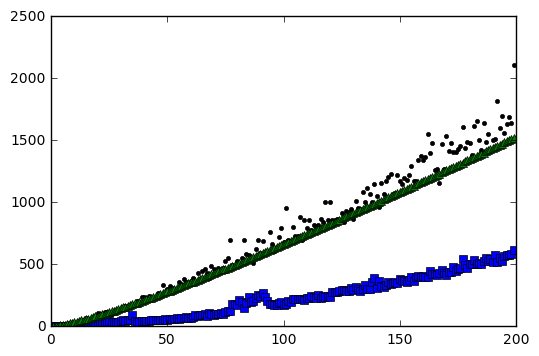

In [105]:
pl.clf()
x = np.arange(200)
y1 = np.array(quick_time_analysis(200)) # Tiempo
y2 = np.array(quick_exper_analysis(200)) # Numero Comparaciones
y3 = np.array(nlogn(200)) # T(n) = nlogn
pl.plot(x, y1, 'bs', x, y2, '.k', x, y3, 'g^')
pl.show()